# Observation of Kerr effect 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We use spectral method to solve this equation numerically, so in order to verify the numerical solution, we compare the solution with analytic solution :



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
#Import parameters from python
parameter = np.loadtxt("../results/parameter_kerr.txt")
Pcr = parameter[0]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])

#Numerical solution
inten_num = np.loadtxt("../results/intensity_kerr.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


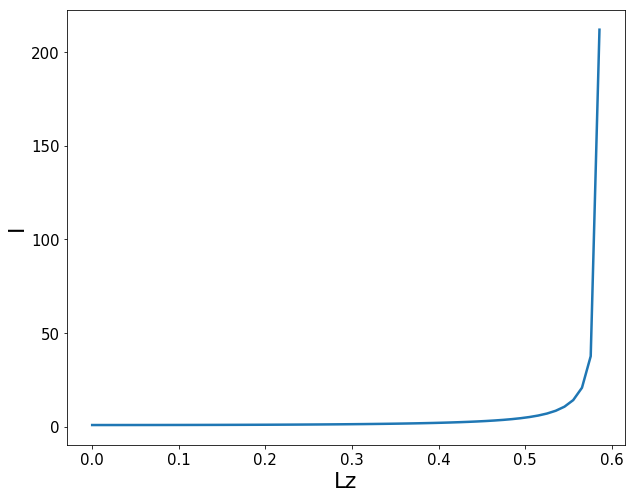

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Energy maximum of laser along z
list_e = []
num_point = inten_num.shape[0]
for i in range(num_point):
    list_e.append(np.max(inten_num[i]))
screen = np.linspace(0, Lz, inten_num.shape[0])
list_e = np.asarray(list_e)

Pcr_const = np.zeros(inten_num.shape[0]) + Pcr
fig, ax = plt.subplots()
ax.plot(screen, list_e)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('I')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


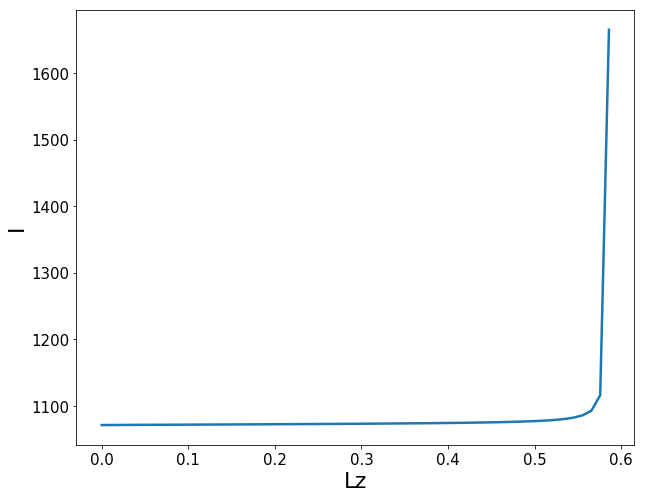

In [4]:
#Total of laser along z
list_e = []
num_point = inten_num.shape[0]
for i in range(num_point):
    list_e.append(np.sum(inten_num[i]))
screen = np.linspace(0, Lz, inten_num.shape[0])
list_e = np.asarray(list_e)

Pcr_const = np.zeros(inten_num.shape[0]) + Pcr
fig, ax = plt.subplots()
ax.plot(screen, list_e)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('I')
ax.legend()
#plt.xlim(0.1, 0.3)
#plt.ylim(1000, 1600)
fig.show()

# Finding the collapse point

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


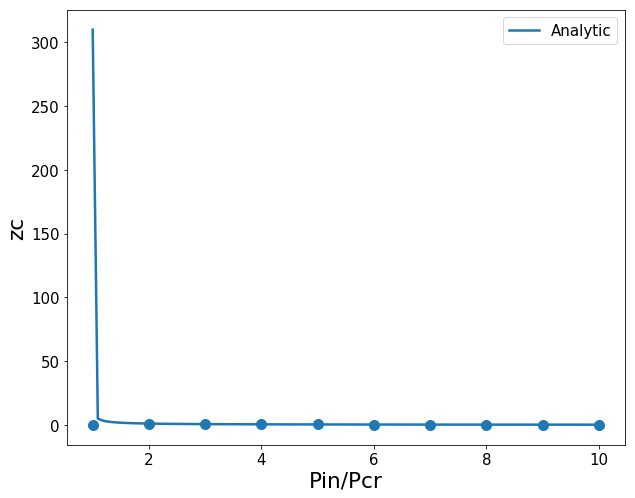

In [8]:
point_div = np.loadtxt("../results/intensity_kerr_divergence.txt")
k = parameter[1]
w0 = 0.7*1e-3
zR = k*w0**2/2*(1.7/2)
def analytic_zc(p):
    return 0.367*zR/((p**(1/2) - 0.852)**2 - 0.0219)**(1/2)

fig, ax = plt.subplots()
x = np.linspace(1, 10, 100)
#print(x)
#print(point_div)
p = np.linspace(1, 10, 10)
ax.scatter(p, point_div)
ax.plot(x, analytic_zc(x), label = 'Analytic')
ax.set_xlabel('Pin/Pcr')
ax.set_ylabel('zc')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


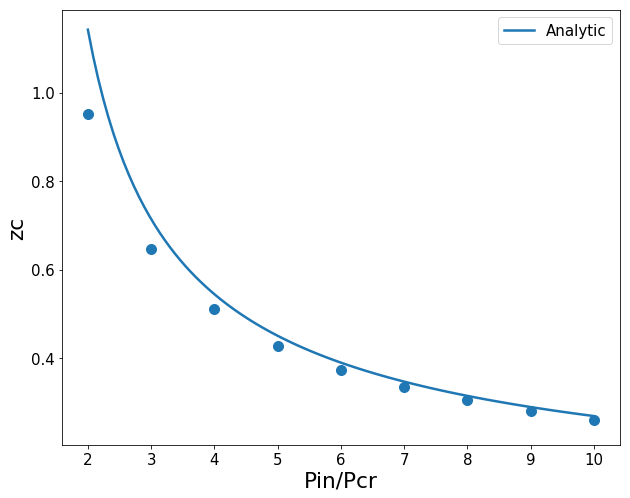

In [9]:
point_div2 = []
for i in range(len(point_div) -1):
    point_div2.append(point_div[i+1])
point_div2 = np.asarray(point_div2)

fig, ax = plt.subplots()
x = np.linspace(2, 10, 100)
p = np.linspace(2,10,9)
ax.scatter(p, point_div2)
ax.plot(x, analytic_zc(x), label = 'Analytic')
ax.set_xlabel('Pin/Pcr')
ax.set_ylabel('zc')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()

In [7]:
print(analytic_zc(35))

0.144010875901
